# TensorFlow Hub - GAN for image extension

- Based on: https://www.tensorflow.org/hub/tutorials/boundless?hl=pt-br
- Paper: https://arxiv.org/pdf/1908.07007.pdf

# Importing the libraries

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
print('TensorFlow version: ', tf.__version__)
print('TensorFlow Hub version: ', hub.__version__)

TensorFlow version:  2.8.2
TensorFlow Hub version:  0.12.0


# Loading the image

In [ ]:
image = Image.open('/content/Marmolada_Sunset.jpeg')

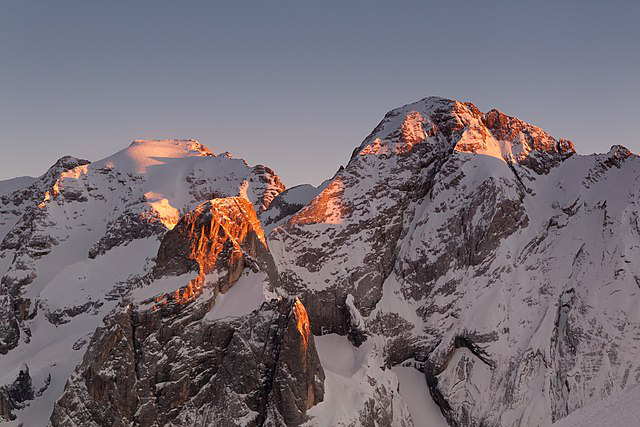

In [ ]:
image

In [ ]:
image.size

(640, 427)

In [ ]:
width, height = image.size
print(width, height)

640 427


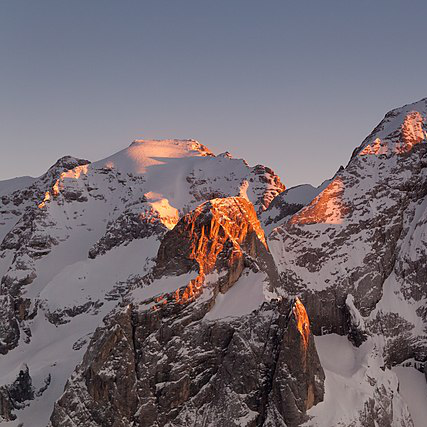

In [ ]:
image = image.crop((0, 0, height, height))
image

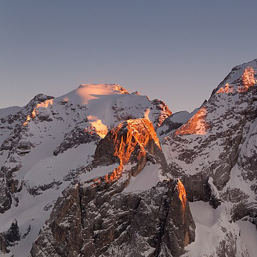

In [ ]:
image = image.resize((257, 257))
image

In [ ]:
image.size

(257, 257)

In [ ]:
type(image)

PIL.Image.Image

In [ ]:
image = np.array(image)

In [ ]:
type(image)

numpy.ndarray

In [ ]:
image

array([[[105, 117, 139],
        [105, 117, 139],
        [105, 117, 139],
        ...,
        [102, 112, 137],
        [101, 111, 136],
        [102, 112, 137]],

       [[104, 116, 138],
        [104, 116, 138],
        [104, 116, 138],
        ...,
        [102, 112, 137],
        [102, 112, 137],
        [102, 112, 137]],

       [[106, 118, 140],
        [106, 118, 140],
        [106, 118, 140],
        ...,
        [103, 113, 138],
        [102, 112, 137],
        [103, 113, 138]],

       ...,

       [[121, 112, 113],
        [141, 132, 131],
        [143, 133, 132],
        ...,
        [138, 126, 126],
        [141, 127, 127],
        [141, 127, 127]],

       [[139, 130, 132],
        [135, 126, 127],
        [135, 125, 125],
        ...,
        [140, 127, 127],
        [139, 126, 126],
        [140, 127, 127]],

       [[134, 125, 127],
        [135, 126, 127],
        [134, 125, 126],
        ...,
        [141, 127, 127],
        [138, 126, 126],
        [138, 126, 126]]

In [ ]:
image.shape

(257, 257, 3)

In [ ]:
image = np.expand_dims(image.astype(np.float32) / 255., axis = 0)

In [ ]:
image.shape

(1, 257, 257, 3)

In [ ]:
image

array([[[[0.4117647 , 0.45882353, 0.54509807],
         [0.4117647 , 0.45882353, 0.54509807],
         [0.4117647 , 0.45882353, 0.54509807],
         ...,
         [0.4       , 0.4392157 , 0.5372549 ],
         [0.39607844, 0.43529412, 0.53333336],
         [0.4       , 0.4392157 , 0.5372549 ]],

        [[0.40784314, 0.45490196, 0.5411765 ],
         [0.40784314, 0.45490196, 0.5411765 ],
         [0.40784314, 0.45490196, 0.5411765 ],
         ...,
         [0.4       , 0.4392157 , 0.5372549 ],
         [0.4       , 0.4392157 , 0.5372549 ],
         [0.4       , 0.4392157 , 0.5372549 ]],

        [[0.41568628, 0.4627451 , 0.54901963],
         [0.41568628, 0.4627451 , 0.54901963],
         [0.41568628, 0.4627451 , 0.54901963],
         ...,
         [0.40392157, 0.44313726, 0.5411765 ],
         [0.4       , 0.4392157 , 0.5372549 ],
         [0.40392157, 0.44313726, 0.5411765 ]],

        ...,

        [[0.4745098 , 0.4392157 , 0.44313726],
         [0.5529412 , 0.5176471 , 0.5137255 ]

# Executing the GAN

In [ ]:
model_name = 'Boundless Quarter' # @param ['Boundless Half', 'Boundless Quarter', 'Boundless Three Quarters']

In [ ]:
model_paths = {
    'Boundless Half' : 'https://tfhub.dev/google/boundless/half/1',
    'Boundless Quarter' : 'https://tfhub.dev/google/boundless/quarter/1',
    'Boundless Three Quarters' : 'https://tfhub.dev/google/boundless/three_quarter/1'
}

In [ ]:
model_path = model_paths[model_name]

In [ ]:
print('Model:', model_name)
print('Model path:', model_path)

Model: Boundless Quarter
Model path: https://tfhub.dev/google/boundless/quarter/1


In [ ]:
model = hub.load(model_path)

In [ ]:
result = model.signatures['default'](tf.constant(image))

In [ ]:
result

{'default': <tf.Tensor: shape=(1, 257, 257, 3), dtype=float32, numpy=
 array([[[[0.41781357, 0.46090642, 0.5422989 ],
          [0.40724623, 0.46304724, 0.55375147],
          [0.40878206, 0.4557672 , 0.5474582 ],
          ...,
          [0.42244086, 0.46200937, 0.55910516],
          [0.4193558 , 0.46198088, 0.5555991 ],
          [0.41168812, 0.44629157, 0.5349143 ]],
 
         [[0.4089467 , 0.45579478, 0.5500015 ],
          [0.40679485, 0.45211142, 0.54053617],
          [0.40333056, 0.4529497 , 0.5438151 ],
          ...,
          [0.42274335, 0.4619532 , 0.5619427 ],
          [0.42857414, 0.4627642 , 0.5608944 ],
          [0.4356427 , 0.46905786, 0.57077205]],
 
         [[0.41153088, 0.4584116 , 0.54794526],
          [0.41869706, 0.46040595, 0.5488785 ],
          [0.41627562, 0.46312225, 0.5496034 ],
          ...,
          [0.42932793, 0.46375582, 0.55974025],
          [0.42479274, 0.46806413, 0.56522745],
          [0.43005756, 0.470255  , 0.5739522 ]],
 
         ...

In [ ]:
new_image = result['default']
masked_image = result['masked_image']

In [ ]:
new_image.shape, masked_image.shape

(TensorShape([1, 257, 257, 3]), TensorShape([1, 257, 257, 3]))

In [ ]:
def show_images(original_image, masked_image, new_image):
  plt.figure(figsize=(24,12))
  plt.subplot(131)
  plt.imshow((np.squeeze(original_image)))
  plt.title('Original image')
  plt.axis('off')

  plt.subplot(132)
  plt.imshow((np.squeeze(masked_image)))
  plt.title('Masked image')
  plt.axis('off')

  plt.subplot(133)
  plt.imshow((np.squeeze(new_image)))
  plt.title('New image')
  plt.axis('off')

  plt.show()

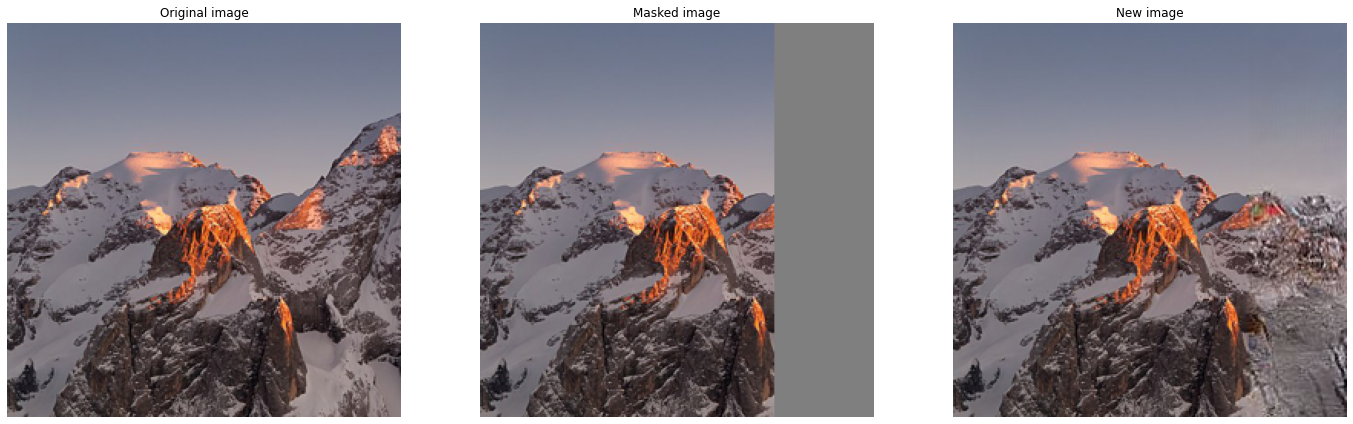

In [ ]:
show_images(image, masked_image, new_image)